<a href="https://colab.research.google.com/github/KhawlahAbaalkhail/MachineLearning/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("fake_news_dataset_4000_rows.csv")
df.head()

,id,title,text,author,source,topic,publish_date,year,month,day,word_count,char_count,title_length,label
0,1,Miracle Cure Update 1,This article discusses Miracle Cure Update 1. ...,Guest Writer,ViralNow,Miracle Cure,2023-09-30,2023,9,30,32,219,21,0
1,2,Conspiracy Update 2,This article discusses Conspiracy Update 2. Ho...,Unknown Reporter,RumorTimes,Conspiracy,2024-07-29,2024,7,29,31,217,19,0
2,3,Technology Update 3,This article discusses Technology Update 3. Th...,Ayesha Khan,BBC News,Technology,2023-05-19,2023,5,19,29,210,19,1
3,4,Economy Update 4,This article discusses Economy Update 4. The i...,Fatima Noor,Al Jazeera,Economy,2023-09-09,2023,9,9,29,207,16,1
4,5,Conspiracy Update 5,This article discusses Conspiracy Update 5. Ho...,Anonymous,RumorTimes,Conspiracy,2024-09-03,2024,9,3,31,217,19,0


In [ ]:
df.shape
df.info()
df.describe(include="all")
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            4000 non-null   int64 
 1   title         4000 non-null   object
 2   text          4000 non-null   object
 3   author        4000 non-null   object
 4   source        4000 non-null   object
 5   topic         4000 non-null   object
 6   publish_date  4000 non-null   object
 7   year          4000 non-null   int64 
 8   month         4000 non-null   int64 
 9   day           4000 non-null   int64 
 10  word_count    4000 non-null   int64 
 11  char_count    4000 non-null   int64 
 12  title_length  4000 non-null   int64 
 13  label         4000 non-null   int64 
dtypes: int64(8), object(6)
memory usage: 437.6+ KB


np.int64(0)

In [ ]:
df = df.drop_duplicates()
df = df.dropna()

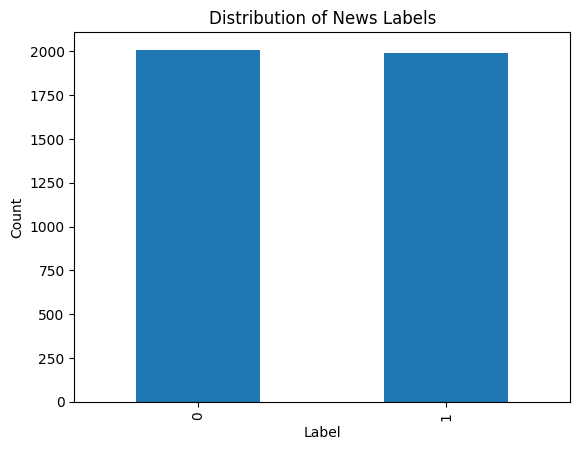

In [ ]:
plt.figure()
df["label"].value_counts().plot(kind="bar")
plt.title("Distribution of News Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

The dataset shows the distribution between fake and real news articles.


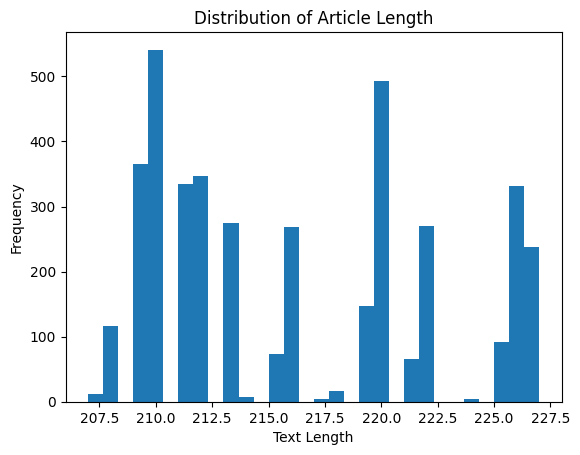

In [ ]:
df["text_length"] = df["text"].astype(str).apply(len)

plt.figure()
plt.hist(df["text_length"], bins=30)
plt.title("Distribution of Article Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

Article lengths vary, with most articles having moderate text length.


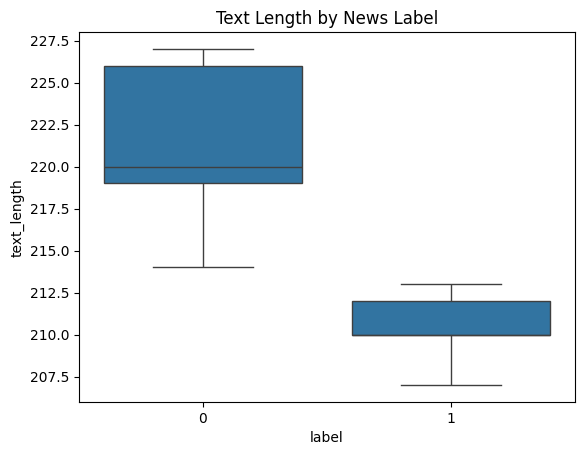

In [ ]:
plt.figure()
sns.boxplot(x="label", y="text_length", data=df)
plt.title("Text Length by News Label")
plt.show()

Fake and real news articles may differ in average text length.


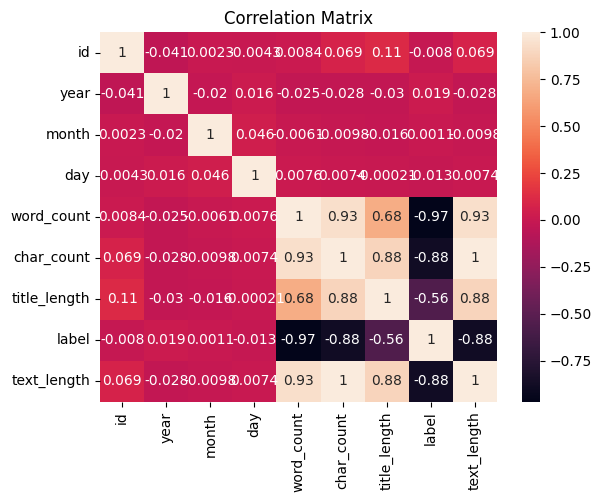

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns

if len(numeric_cols) > 0:
    plt.figure()
    sns.heatmap(df[numeric_cols].corr(), annot=True)
    plt.title("Correlation Matrix")
    plt.show()

Correlation between numerical features helps identify relationships within the dataset.


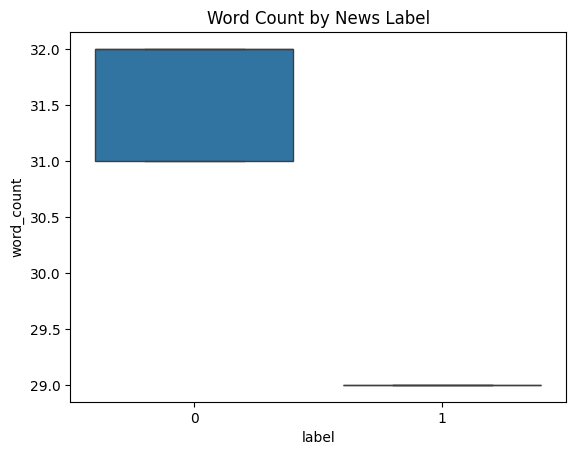

In [ ]:
df["word_count"] = df["text"].astype(str).apply(lambda x: len(x.split()))

plt.figure()
sns.boxplot(x="label", y="word_count", data=df)
plt.title("Word Count by News Label")
plt.show()

Word count comparison provides deeper insight into writing patterns between fake and real news.
